In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> Storing the csv file into a DataFrame

In [91]:
df= pd.read_csv("standard_scaler_dataset1.csv")
df.head()

,Age,Salary,Experience
0,56,32695,3
1,46,78190,7
2,32,35258,6
3,60,117538,8
4,25,69504,27


> Checking for Outliers

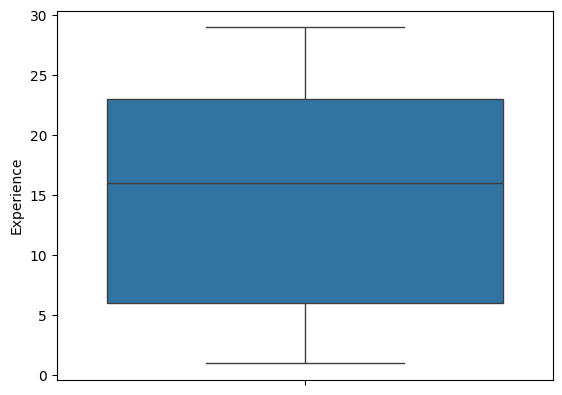

In [92]:
sns.boxplot(df["Experience"])
plt.show()

> Information of records

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Age         100 non-null    int64
 1   Salary      100 non-null    int64
 2   Experience  100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [94]:
from sklearn.linear_model import LinearRegression #class
from sklearn.model_selection import train_test_split #method/function

> Assigning x and y values   
x = Independent variables   
y = Dependent variables

In [95]:
x=df.drop(columns="Experience", axis=1)
y=df["Experience"]

> Testing the model with train_test_split method

In [96]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size = 0.8,random_state=42)

> Creating object model to extract the methids from LinearRegression Class

In [97]:
model = LinearRegression()

>Training the model using fit method internally y = mx+c and retuns slope and intercept value

In [98]:
model.fit(xtrain,ytrain)  # model training
#xtrain - 2D array
#ytrain - 1D array  

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [99]:
xtrain

,Age,Salary
55,64,117939
88,62,56105
26,39,114651
42,35,120982
69,61,123426
...,...,...
60,57,86044
71,27,52299
14,41,82251
92,62,74262


In [100]:
model.coef_  # slope values

array([5.55536133e-02, 3.62983445e-05])

In [101]:
model.intercept_  # intercept value

np.float64(8.381962472347514)

In [102]:
xtest # considering 20% of data for testing [ ytest to be predicted ]

,Age,Salary
83,35,55939
53,61,84268
70,51,147845
45,31,117054
44,42,30206
39,38,128806
22,19,65222
80,38,125259
10,28,33561
0,56,32695


>Using xtest values predicting ytest

In [103]:
ytest_predicted = model.predict(xtest)
ytest_predicted

array([12.35683203, 14.82952178, 16.58172549, 14.3529909 , 11.81164202,
       15.16844434, 11.80493175, 15.03969411, 11.15567238, 12.67973919,
       14.60176972, 16.67119288, 15.15776149, 15.35948854, 12.59651712,
       12.29368294, 12.64127589, 15.16977625, 14.75667902, 14.53319814])

>Using xtrain values predicting ytrain

In [104]:
ytrain_predicted = model.predict(xtrain)
ytrain_predicted

array([16.21838417, 13.86280511, 14.71019488, 14.71778525, 16.25089235,
       11.40457815, 11.16612831, 13.14304505, 12.42970798, 13.99731766,
       12.72336669, 12.70978911, 13.30729816, 12.20217591, 11.33390728,
       12.78556692, 14.29949024, 12.66371227, 15.73846862, 11.94211943,
       15.67304677, 13.32072363, 13.71618588, 13.23045347, 15.15863886,
       16.9820499 , 15.37812674, 14.57945828, 14.80709522, 16.43021018,
       15.13703423, 15.98161408, 11.63480141, 13.8150746 , 12.15281217,
       11.79080878, 13.0895838 , 13.97644009, 11.57169573, 15.44320275,
       13.01818897, 14.85667294, 14.87750799, 14.96343019, 13.7862871 ,
       14.38209816, 14.10582234, 14.59842827, 13.07729561, 11.99456853,
       16.08592038, 16.61063211, 15.20293177, 12.36443443, 13.83889233,
       14.10986459, 12.79337708, 14.86207317, 12.89601877, 15.02546826,
       15.07990957, 14.80224056, 14.39432979, 12.80596057, 13.77559624,
       14.69026399, 15.76181447, 11.43948513, 14.39046192, 12.45

> Finding the relationship between the columns

In [105]:
df.corr()

,Age,Salary,Experience
Age,1.000000,0.000555,0.049534
Salary,0.000555,1.000000,0.192420
Experience,0.049534,0.192420,1.000000


In [106]:
targeted_mean=ytest.mean()
targeted_mean

np.float64(16.5)

> Checking the score of the model how much it is performing good if it is 76% - 24% error [ to check this we use MSE ]

In [107]:
model.score(xtrain,ytrain)

0.026809335152035096

In [108]:
model.score(xtest,ytest)  # R squared value

-0.010710682178010078

# MODEL EVALUATION

In [109]:
# MODEL EVALUATION
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error

r2Score for the test

In [110]:
r2_score(ytest,ytest_predicted)  # -1.07 %

-0.010710682178010078

r2Score for the train

In [111]:
r2_score(ytrain,ytrain_predicted) # 2%

0.026809335152035096

> Underfit coz tarin_score = 2% and test_score = -1.07% {very bad on training and very bad on testing}

Based on r2score we can tell underfit - goodfit - overfit

# STANDARD_SCALER

> To normalize the values we use standard_scaler { to keep all the values in same range }

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler = StandardScaler()

#standardizing the values

In [114]:
xtrain_scaled = scaler.fit_transform(xtrain) 
# fit learns the pattern and transform transforms the data 
# fit internally calculates mean and standard deviation ( z=x-mean/stddev )
# transform applies the formula (x-mean)/stddev to all the values

xtrain_scaled

array([[ 1.58134519,  0.81861106],
       [ 1.4422494 , -0.98672281],
       [-0.15735211,  0.7226131 ],
       [-0.43554367,  0.90745589],
       [ 1.37270151,  0.97881203],
       [-1.47876205, -1.08724622],
       [-1.0614747 , -1.54714885],
       [-1.0614747 ,  0.04297792],
       [-0.92237891, -0.62016127],
       [ 0.81631838, -0.4763687 ],
       [-0.01825632, -0.96485467],
       [ 0.12083946, -1.0651445 ],
       [-0.01825632, -0.49517122],
       [ 0.05129157, -1.42875721],
       [-1.61785783, -1.05472137],
       [-0.2269    , -0.78077099],
       [ 0.32948314,  0.07947349],
       [-1.40921416, -0.11915002],
       [ 1.37270151,  0.56664562],
       [-0.15735211, -1.5038797 ],
       [-0.29644789,  1.58644875],
       [ 1.58134519, -1.5121131 ],
       [-0.36599578,  0.0571382 ],
       [-1.20057048,  0.20265336],
       [ 1.37270151,  0.10026137],
       [ 1.37270151,  1.56691632],
       [-0.57463946,  1.52796824],
       [-0.85283102,  1.06429927],
       [-1.54830994,

In [115]:
xtest_scaled = scaler.transform(xtest)
xtest_scaled

array([[-0.43554367, -0.99156943],
       [ 1.37270151, -0.16446293],
       [ 0.6772226 ,  1.69176038],
       [-0.71373524,  0.79277219],
       [ 0.05129157, -1.74288192],
       [-0.2269    ,  1.13588899],
       [-1.54830994, -0.72053869],
       [-0.2269    ,  1.03232914],
       [-0.92237891, -1.6449278 ],
       [ 1.02496205, -1.67021193],
       [-0.01825632,  0.54603291],
       [ 1.23360573,  1.4062482 ],
       [-0.71373524,  1.4400869 ],
       [-0.64418735,  1.55766104],
       [ 0.32948314, -1.2903076 ],
       [-1.13102259, -0.59551945],
       [-1.13102259, -0.31593416],
       [-0.71373524,  1.44975092],
       [ 0.81631838,  0.13442123],
       [ 0.25993525,  0.31214008]])

> Here again we checking the score again with normalized values

In [116]:
model = LinearRegression()

In [117]:
model.fit(xtrain_scaled,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [118]:
model.coef_

array([0.79878213, 1.24324473])

In [119]:
model.intercept_

np.float64(13.9375)

In [120]:
model.score(xtrain_scaled,ytrain)

0.026809335152035207

In [121]:
model.score(xtest_scaled,ytest)

-0.010710682178010078

> ROBUST SCALER

In [122]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler

In [123]:
robust_scaler = RobustScaler()

InterQuartileRange

In [124]:
robust_scaler.quantile_range

(25.0, 75.0)

In [125]:
xtrain_robust_scaled= robust_scaler.fit_transform(xtrain)

In [126]:
xtest_robust_scaled=robust_scaler.transform(xtest)

In [127]:
model = LinearRegression()

In [128]:
model.fit(xtrain_robust_scaled,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [129]:
model.coef_

array([1.47217075, 2.20492479])

In [130]:
model.score(xtrain_scaled,ytrain)  

0.009850620873227744

In [131]:
model.score(xtest_scaled,ytest)  

-0.005557265505973463

>MinMax Scaler

In [132]:
min_max_scaler = MinMaxScaler()

In [133]:
min_max_scaler.data_max_

AttributeError: 'MinMaxScaler' object has no attribute 'data_max_'

In [ ]:
min_max_scaler.data_min_

array([1.8000e+01, 3.2693e+04])

In [ ]:
xtrain_min_max_scaler = min_max_scaler.fit_transform(xtrain)

In [ ]:
xtest_min_max_scaler = min_max_scaler.transform(xtest)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(xtrain_min_max_scaler, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
model.coef_

array([2.55546621, 4.23351221])

In [ ]:
model.score(xtrain_min_max_scaler,ytrain)

0.026809335152035096

In [ ]:
model.score(xtest_min_max_scaler,ytest)

-0.010710682178010078

1) slope values before SS while model training        
array([5.55536133e-02, 3.62983445e-05])         

2) slope values after standardscaler     
array([0.79878213, 1.24324473])         

3) slope value after robust_scaler         
array([1.47217075, 2.20492479])    

4) slope value after max_min_scaler     
array([2.55546621, 4.23351221])     